<a href="https://colab.research.google.com/github/demitw/Machine-learning-coursework/blob/model/Model_Training/randomforset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [2]:
# Check for missing values in each column
print(df.isnull().sum())

missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


In [3]:
unknown_counts = (df == "unknown").sum()
print(unknown_counts)

unknown_percentage = (df == "unknown").mean() * 100
print(unknown_percentage)

# Filter columns with at least one "unknown"
columns_with_unknown = unknown_counts[unknown_counts > 0]
print(columns_with_unknown)


age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000


In [4]:
# Drop rows with 'unknown' in 'loan' or 'housing' columns
df_cleaned = df[(df['loan'] != 'unknown') & (df['housing'] != 'unknown')]

# Check the shape of the new dataset
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)



Original dataset shape: (41188, 21)
Cleaned dataset shape: (40198, 21)


In [5]:
unknown_counts = (df_cleaned == "unknown").sum()
print(unknown_counts)

age                  0
job                325
marital             79
education         1691
default           8370
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [6]:
# Drop the 'duration' column
df_cleaned = df_cleaned.drop(columns=['duration'])

# Check the result
print(df_cleaned.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994

In [7]:
# Convert 'pdays' column to binary
df_cleaned['pdays'] = df_cleaned['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Check the result
print(df_cleaned['pdays'].head())


0    0
1    0
2    0
3    0
4    0
Name: pdays, dtype: int64


In [8]:
# Check unique values in the 'pdays' column
unique_pdays = df_cleaned['pdays'].unique()

# Print the unique values
print(unique_pdays)


[0 1]


In [9]:
# Check class distribution of the target variable 'y'
class_counts = df_cleaned['y'].value_counts()

# Print the class counts
print(class_counts)

# Optionally, display the percentage of each class
print(class_counts / len(df_cleaned) * 100)


y
no     35665
yes     4533
Name: count, dtype: int64
y
no     88.72332
yes    11.27668
Name: count, dtype: float64


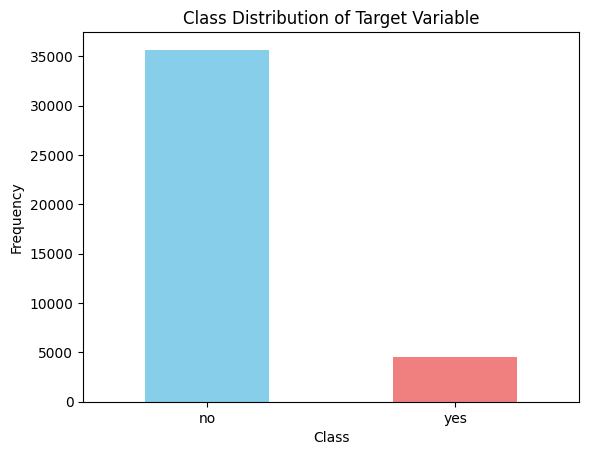

In [10]:
import matplotlib.pyplot as plt

# Plot the class distribution
df_cleaned['y'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()
